# Курс "Программирование на языке Python. Уровень 4. Анализ и визуализация данных на языке Python. Библиотеки numpy, pandas, matplotlib"

## Модуль 4. Библиотека pandas

Библиотека pandas - средство для анализа табличных ("панельных") данных. Pandas - это аббревиатура, в основе которой лежат слова Panel Data Analysis. 

Pandas может быть использован в сочетании с Numpy и поддерживает работу с данными в том же стиле. Также объекты pandas могут быть использованы в библиотеках машинного обучения типа sklearn или keras. 

Основные структуры библиотеки - объекты Series и DataFrame. DataFrame - табличная структура данных, а Series - колонка в этой таблице. DataFrame можно рассматривать как словарь объектов Series, объединенных одним индексом.

Импорт библиотеки pandas:

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

### Объект Series

Series - это объект, похожий на одномерный массив: он содержит последовательность данных, которая сопровождается индексными метками для доступа к ним.

Создадим простейший объект Series и выведем его на экран:

In [ ]:
series = pd.Series([2,12,85,0,6])
print(series)

Индекс - колонка слева, данные - колонка справа. Выгрузить только данные можно через свойство ```.values```, выгрузить только индекс - ```.index```.

In [ ]:
print(series.values)

In [ ]:
print(type(series.values)) # знакомый нам массив numpy! <class 'numpy.ndarray'>

In [ ]:
print(series.index)

Можно создать Series с заданным индексом:

In [ ]:
series2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
print(series2)


In [ ]:
print(series2.index)

Для доступа к данным можно использовать как метки индекса, так и порядковую позицию элемента:

In [ ]:
# эти выражения эквиваленты
print(series2[2])
print(series2['a'])

Поддерживаются срезы по порядковому номеру и поиск по набору значений индекса:

In [ ]:
# эти выражения эквивалентны?
print(series2[1:-1])
print(series2[['a', 'b']])
print(series2[['b', 'a']])

Также поддерживается булев индекс - как на чтение, так и на запись:

In [ ]:
print(series2[series2 > 0])

In [ ]:
series2[series2 <= 3] = 100500
print(series2)

Broadcasting поддерживается тоже:

In [ ]:
arr = np.array([10,20,30,40])
series4 = arr + series2
print(series4)

In [ ]:
print(series2 * 2)

In [ ]:
print(np.sqrt(series2))

Также можно выполнять агрегатные запросы к объекту Series - вычислять среднее, сумму и т.д.

In [ ]:
print(series2.mean())

Объект Series можно рассматривать как словарь с однотипными данными. Более того, для создания объекта Series можно использовать готовый словарь:

In [ ]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
series3 = pd.Series(sdata)
print(series3)

In [ ]:
'Texas' in series3

In [ ]:
'Alaska' in series3

In [ ]:
bad_data = {'a':1, 'b':2.0, 'c':'Hello World'}
obj_series = pd.Series(bad_data)
print(obj_series)

In [ ]:
print(obj_series[obj_series > 1]) # с таким series этот фокус уже не пройдет

In [ ]:
print(obj_series.values)

In [ ]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
states = ['California', 'Ohio', 'Oregon', 'Texas']
series4 = pd.Series(sdata, index=states)
print(series4)

```NaN``` - отсутствующие данные, "Not a Number" - "не число". По этому признаку можно фильтровать данные:

In [ ]:
print(pd.notnull(series4))

In [ ]:
print(pd.isnull(series4))

In [ ]:
print(series4[series4.notnull()])

Над объектами Series можно выполнять арифметические операции, но при этом важно помнить про выравнивание данных по индексам: если индексы встречаются в обеих объектах, арифметическая операция выполняется как обычно, но если индекс не найден - вместо результата операции устанавливается ```NaN```.

In [ ]:
print(series3 + series4)

Индекс объекта можно изменять "налету" через свойство ```.index```.

In [ ]:
print(series)

In [ ]:
series.index = ['раз', 'два', 'три', 'четыре', 'пять']
print(series)

In [ ]:
series.index[2] = 100

__ВАЖНО__: У объекта Series есть свойство ```.name```, и это свойство играет важную роль в работе с DataFrame.

In [ ]:
series3.name = 'Population'
print(series3)

__ПРАКТИКА__ 

Создайте объект Series для хранения оценок по какому-либо предмету, например, по "Линейной Алгебре". Пусть он содержит 5 студентов со случайными оценками от 2 до 5. Фамилии студентов должны быть индексами.

Выведите средний балл для всех, у кого оценка больше или равна 3.

Создайте другой объект Series, для хранения оценок по другому предмету, например по "Математическому Анализу". Посчитайте средний балл студентов по этим двум предметам. 

In [ ]:
families = ['Ivanov', 'Petrov', 'Sidorov', 'Kuznetsov', 'Kotova']
# ваш код здесь

## Объект DataFrame

DataFrame ("каркас для данных") - объект для представления табличных данных. Он состоит из упорядоченной коллекции столбцов, причем типы данных в разных столбцах могут различаться. Он содержит два индекса: по строкам и по столбцам. Можно сказать, что DataFrame - это словарь объектов Series, имеющий общий индекс.

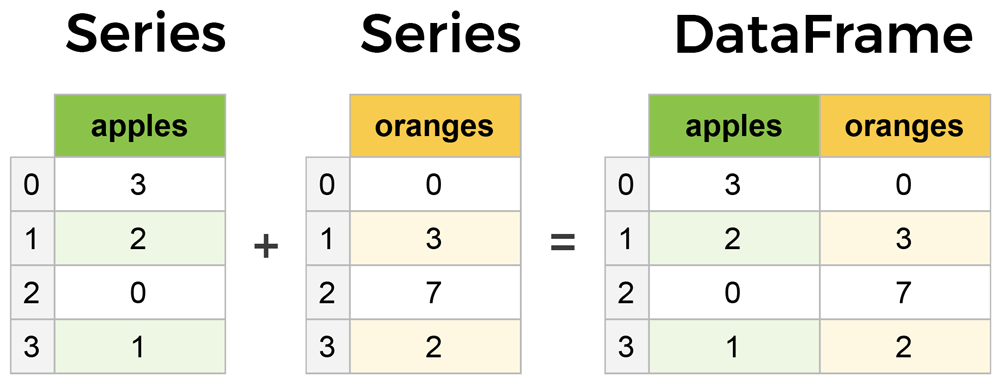

В этом блоке мы рассмотрим базовые CRUD-операции с DataFrame: добавление новых строк/столбцов, удаление строк/столбоцов, доступ к столбцам и строкам.

Перед тем, как приступить к знакомству с DataFrame, определим ряд терминов:
- "запись", "строка" - горизонтальный элемент DataFrame
- "поле", "признак", "столбец", "колонка" - вертикальный элемент DataFrame


Простой DataFrame можно создать из словаря:

In [ ]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}
purchases = pd.DataFrame(data)
print(purchases)

Можно при создании сразу указать индекс (он указывается в этом случае отдельно), а можно и потом:

In [ ]:
names = ['Carl', 'Julia', 'Alex', 'Leela']
purchases.index = names
print(purchases)

In [ ]:
purchases = pd.DataFrame(data, index=names)
print(purchases)

Сделать "горизонтальный срез" - получить нужную строку - можно, обратившись к свойству ```.loc``` и указав значение индекса в квадратных скобках (обратите внимание: pandas вернет объект Series):

In [ ]:
jul = purchases.loc['Julia']
print(jul)
print(type(jul))

Также можно указать требуемый диапазон строк (обратите внимание: при таком запросе pandas вернет DataFrame):

In [ ]:
jul_1 = purchases[0:-1]
print(jul_1)
print(type(jul_1))

__ВОПРОС__: как получить вертикальный срез?

In [ ]:
print(purchases[ purchases.columns[:-1] ])

Для доступа к объекту DataFrame по целочисленным индексам, можно обращаться к свойству ```.iloc``` объекта:

In [ ]:
# эти выражения эквивалентны
print(purchases.loc['Carl', ['oranges']])
print(purchases.iloc[0, [1]])

Свойство ```.iloc``` также поддерживает индексацию по списку

In [ ]:
print(purchases.iloc[ [1,2,3] ])

Добавить строку в DataFrame можно методом ```.append()```. Им же можно объединять DataFrame'ы. В результате будет создан новый DataFrame.

‼️‼️‼️ __ВНИМАНИЕ__! ```append()``` более не поддерживется в ```pandas```.

Можно использовать либо ```pd.concat()```, либо ```df.loc()```.

In [ ]:
x = purchases.append({'apples':5, 'oranges':2})
print(x)

__ВОПРОС__: Как добавить строку с нужным индексом?

In [ ]:
erics_purchases = {'apples':5, 'oranges':2}
purchases = purchases.append(pd.DataFrame(erics_purchases, index=['Eric']))
print(purchases)

Добавить колонку можно двумя способами:
1. с помощью метода ```insert()```
2. либо точно так же, как при добавлении элемента в словарь.

In [ ]:
purchases.drop(['Eric'], inplace=True)
purchases.insert(1, 'bananas', [4,5,4,3])
print(purchases)

In [ ]:
purchases['kiwi'] = [3,0,0,0,]
print(purchases)

Удалить строку или столбец можно методом ```.drop()``` (чтобы метод сработал в самом объекте, передайте параметр inplace=True):

In [ ]:
purchases.drop(['Alex'], inplace=True)
print(purchases)

Чтобы удалить столбец, укажите в методе ```.drop()``` параметр ```axis=1```:

In [ ]:
purchases.drop(['oranges'], axis=1, inplace=True)
print(purchases)

DataFrame можно транспонировать:

In [ ]:
print(purchases.T)

Изменять значение в DataFrame можно, обращаясь к его элементам через конструкции в квадратных скобках, при этом в первой скобке мы указываем название поля, во второй - значение индекса записи, которую мы хотим изменить. Также можно пользоваться методом ```.at()```.

In [ ]:
# эти выражения эквивалентны
purchases['apples']['Carl'] = 1
purchases.at['Carl', 'apples'] = 1
print(purchases)


In [ ]:
purchases['Carl']['apples'] = 100 # так уже не получится

In [ ]:
purchases.T['Carl']['apples'] = 100 # а вот так можно (но не нужно)
print(purchases)

"Булев индекс", или поиск по маске - работает в Pandas аналогично numpy.

In [ ]:
mask = (purchases['apples'] > 5)
print(mask)
print(type(mask))

При поиске по маске pandas возвращает подходящие записи (строки) в виде DataFrame.

In [ ]:
print(purchases[purchases['apples'] > 5])

Поиск по маске также работает и на запись, но без указания поля при этом будут изменены значения всех полей, т.к. векторизация:

In [ ]:
purchases[purchases['apples'] > 5] = 10
print(purchases)

__ВОПРОС__: где нужно указать конкретное поле, чтобы операция присваивания сработала корректно?

In [ ]:
### ???
purchases['apples'][purchases['apples'] > 5] = 10
print(purchases)

### Другие манипуляции с DataFrame

Узнать, есть ли в DataFrame элемент с нужным индексом, можно обратившись к свойству ```.index``` DataFrame как к словарю:

In [ ]:
print('Eric' in purchases.index)

In [ ]:
print('Carl' in purchases.index)

Узнать, есть ли поле в DataFrame можно аналогичным образом:

In [ ]:
print('apples' in purchases)

In [ ]:
print('oranges' in purchases)

Изменить порядок записей можно функцией ```.reindex()```:

In [ ]:
leela_first = purchases.reindex(index=['Leela', 'Julia', 'Carl'])
print(leela_first)

In [ ]:
leela_first.at['Carl', 'kiwi'] = 4
print(leela_first)
print(purchases)

Порядок колонок меняется той же функцией, но вызванной с параметром ```columns=[]```:

In [ ]:
bananas_first  = purchases.reindex(columns=['bananas', 'apples', 'kiwi'])
print(bananas_first)

In [ ]:
bananas_first.at['Carl', 'kiwi'] = 4
print(purchases)

### Агрегатные вычисления

Посчитать среднее по любой оси можно используя функцию ```.mean()```, взять сумму - ```.sum()``` и т.д. 

In [ ]:
print(purchases)
print("Total apples: {}".format(purchases['apples'].sum()))

In [ ]:
# а теперь посчитаем, сколько предметов в корзине у каждого
print(purchases.sum(axis=1))

In [ ]:
# можем добавить это как признак
purchases['items'] = purchases.sum(axis=1)
print(purchases)

__ВОПРОС__: как взять агрегатную функцию по избранным признакам? Добавьте признак "items exotic", который будет содержать только сумму по полям "bananas" и "kiwi".

In [ ]:
exotics = ['bananas', 'kiwi']

purchases['items exotic'] = purchases[exotics].sum(axis=1)
print(purchases)

### __ПРАКТИКА__

1. Создайте DataFrame для пяти студентов и их оценок по предметам matan, linal, matstat и cs, заполните их случайными данными
2. Добавьте еще одного студента и данные по его упеваемости по предметам
2. Отсортируйте студентов по именам
3. Добавьте предмет physics и оценки по нему
6. Добавьте признак "mean" ("средний балл"), посчитайте в нем средний балл по каждому студенту.
7. Посчитайте средний балл по всем предметам, кроме "cs"
8. Удалите предмет "cs"

In [ ]:
families = ['Ivanov', 'Petrov', 'Sidorov', 'Kuznetsov', 'Kotova']
subjects = ['matan', 'linal', 'matstat', 'cs']

df_marks = ? # ваш код здесь и далее

### Анализ и разбор датасета

В качестве примера рассмотрим набор данных о пассажирах затонувшего "Титаника".

In [ ]:
data_titanic = pd.read_csv('data/titanic.csv',
                  index_col='PassengerId')

Чтобы проверить, что у нас все загрузилось корректно, посмотрим на форму получившегося объекта:

In [ ]:
data_titanic.shape

Посмотрим, что у нас в первых нескольких записях:

In [ ]:
data_titanic.head(5)

Посмотрим статистику по датасету:

In [ ]:
data_titanic.describe()

#### ПРАКТИКА

Проанализируйте загруженные данные:

1. Сколько было на Титанике мужчин, женщин и несовершеннолетних детей?


In [1]:
# ваш код здесь

2. В каких портах Титаник брал пассажиров на борт (признак Embarked) и сколько пассажиров взошло на борт в этих портах?


In [ ]:
# ваш код здесь

3. Действительно ли у пассажиров, путешествующих 3-м классом нет номеров кают?


In [ ]:
# ваш код здесь

4. Есть предположение, что женщин и детей не было среди путешествующих 3-м классом. Проверьте.


In [ ]:
# ваш код здесь

5. Каков процент выживших среди пассажиров кают всех классов?

In [ ]:
# ваш код здесь